# Diabetes Prediction Model

# Data Science Capstone Project

**Team Members:**

Kholoud Hamed M Al Nazzawi, Nana Afua Martinson, Krushal Shah, Xinmeng Wang






In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Data set Link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import time
import warnings

# Exploratory Data Analysis (EDA)

In [3]:
#For loading data in Colab
#df = pd.read_csv('/content/gdrive/MyDrive/Data science capestone 1/diabetes_prediction_dataset.csv')
df = pd.read_csv('/content/gdrive/MyDrive/Drexel/Final Project DSCI 592/diabetes_prediction_dataset.csv')
#For loading data in Jupyter Notebooks
#df = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
# check for duplicated rows

df.duplicated().sum()

3854

In [9]:
# drop duplicates

df = df.drop_duplicates()
df.shape

(96146, 9)

In [10]:
# check for null values in each column

df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [11]:
# Count how many o and 1 are there in the diabetes column (show as persentage)

diabetes_counts = df['diabetes'].value_counts(normalize =True)

percent_0 = (diabetes_counts[0] / diabetes_counts.sum()) * 100
percent_1 = (diabetes_counts[1] / diabetes_counts.sum()) * 100

diabetes_counts = df['diabetes'].value_counts()

print(f"Percentage of patients without diabetes: {percent_0:.2f}%")
print(f"Percentage of patients with diabetes: {percent_1:.2f}%")

print(f"Number of patients without diabetes: {diabetes_counts[0]}")
print(f"Number of patients with diabetes: {diabetes_counts[1]}")

Percentage of patients without diabetes: 91.18%
Percentage of patients with diabetes: 8.82%
Number of patients without diabetes: 87664
Number of patients with diabetes: 8482


since our predicdictive value - if the patient is diabetes or non diabetes, the model that we are going to make may just predict the majority class to achieve high accuracy, but it won't generalize well.

Many machine learning algorithms allow us to assign different weights to classes. By giving higher weights to minority classes, we can penalize misclassifications of these classes more severely, encouraging the model to focus on them.

And we will avoid using accuracy alone as a performance metric, especially in imbalanced datasets. Metrics like precision, recall, F1-score, ROC-AUC, or PR-AUC are more informative

--

In [12]:
# Get the list and number of unique values for each variable

unique_values = {column: df[column].unique() for column in df.columns}
unique_counts = {column: df[column].nunique() for column in df.columns}

unique_values, unique_counts

({'gender': array(['Female', 'Male', 'Other'], dtype=object),
  'age': array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
         32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
         72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
         73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
         19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
         11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
         22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
         61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
         48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
         35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
          1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
          0.32,  1.72,  1.48]),
  'hypertension': array([0, 1]),
  'heart_disease': array([1, 0]),
  'smoking_history': array(['never', 'No

In [13]:
# percentage of different gender in the data set

gender_percentage = df['gender'].value_counts(normalize =True)
gender_counts = df['gender'].value_counts()

percent_0 = (gender_counts[0] / gender_counts.sum()) * 100
percent_1 = (gender_counts[1] / gender_counts.sum()) * 100
percent_2 = (gender_counts[2] / gender_counts.sum()) * 100

print(f"Percentage of female patients: {percent_0:.2f}%")
print(f"Percentage of male patients: {percent_1:.2f}%")
print(f"Percentage of other patients: {percent_2:.2f}%")
print()
print(f"Number of female patients: {gender_counts[0]}")
print(f"Number of male patients: {gender_counts[1]}")
print(f"Number of other patients: {gender_counts[2]}")

Percentage of female patients: 58.41%
Percentage of male patients: 41.57%
Percentage of other patients: 0.02%

Number of female patients: 56161
Number of male patients: 39967
Number of other patients: 18


<ipython-input-13-ca52598146c2>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent_0 = (gender_counts[0] / gender_counts.sum()) * 100
<ipython-input-13-ca52598146c2>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent_1 = (gender_counts[1] / gender_counts.sum()) * 100
<ipython-input-13-ca52598146c2>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent_2 = (gender_counts[2] / gender_counts.sum()) * 100
<ipython-input-1

In [14]:
# Drop the 'other' value in the gender column because it represents 0.02% of the dataset

df = df.drop(df[df['gender'] == 'Other'].index)
df.shape

(96128, 9)

In [15]:
df['gender'].value_counts()

,count
gender,
Female,56161
Male,39967


In [16]:
# Show how many people are smokers using the smoking_history column

smoking_counts = df['smoking_history'].value_counts()

print(f"Number of non-smokers: {smoking_counts['never']}")
print(f"Number of current smokers: {smoking_counts['current']}")
print(f"Number of No Info: {smoking_counts['No Info']}")
print(f"Number of ever smokers: {smoking_counts['ever']}")
print(f"Number of former smokers: {smoking_counts['former']}")
print(f"Number of not current: {smoking_counts['not current']}")



Number of non-smokers: 34395
Number of current smokers: 9197
Number of No Info: 32881
Number of ever smokers: 3997
Number of former smokers: 9299
Number of not current: 6359


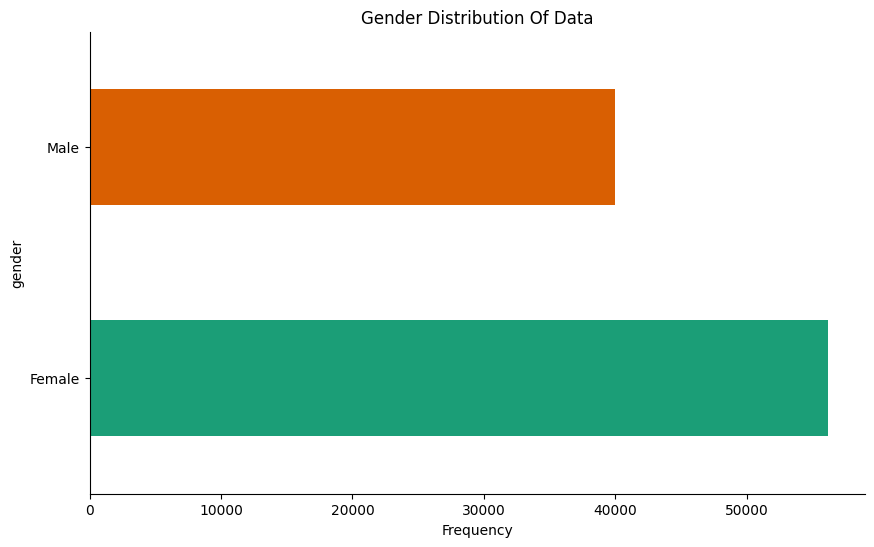

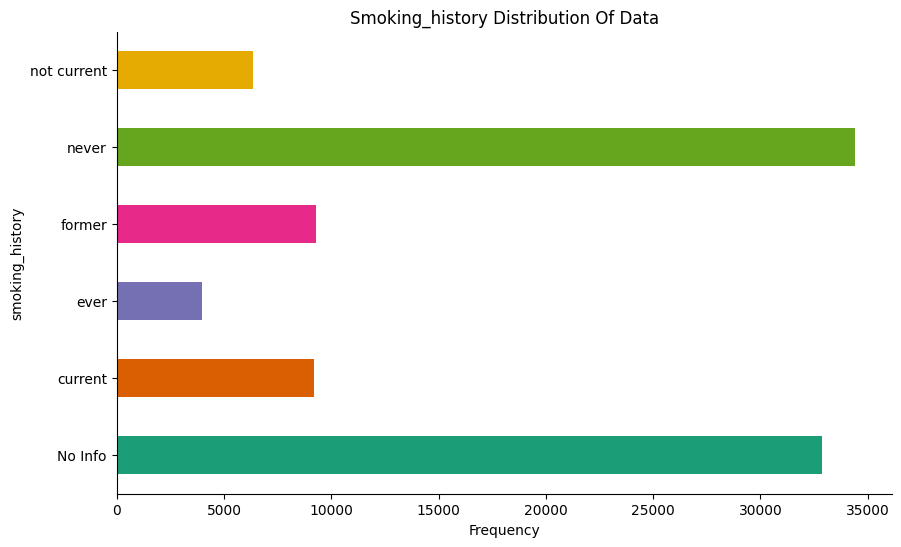

In [17]:
# visualize distribution of categorical columns in data

categorical_columns = [column for column in df.columns if df[column].dtype == object]
numeric_columns =  [column for column in df.columns if df[column].dtype  != object]

categorical_columns

for column in categorical_columns:
  plt.figure(figsize=(10, 6))
  df.groupby(column).size().plot(kind='barh', color=sns.palettes.mpl_palette("Dark2"))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.title(column.capitalize() + " Distribution Of Data")
  plt.xlabel("Frequency")  # Add x-axis title here
  plt.show()
  print("\n" *5)

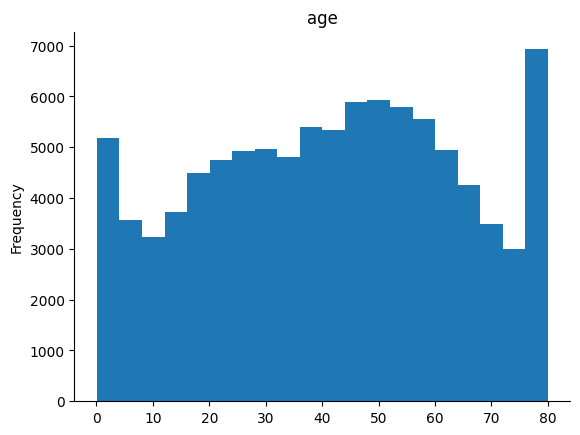

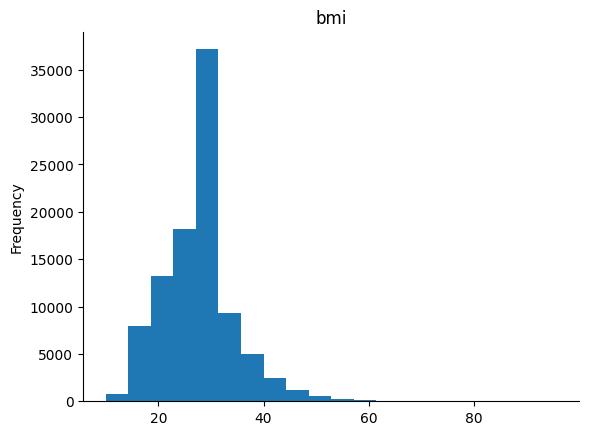

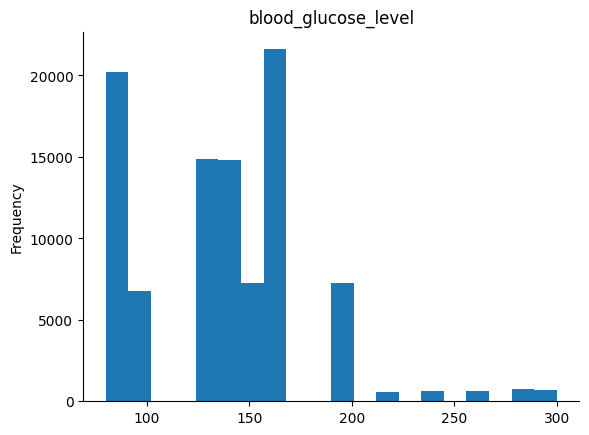

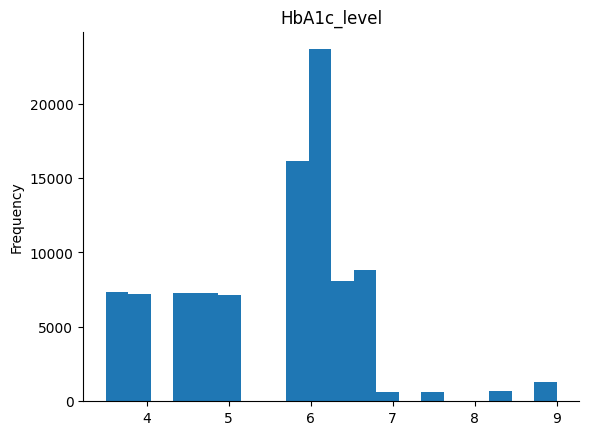

In [18]:
#distribution of numeric

selected_columns = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']

for column in selected_columns:
  df[column].plot(kind='hist', bins = 20, title=column)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.show()
  print("\n" *5)

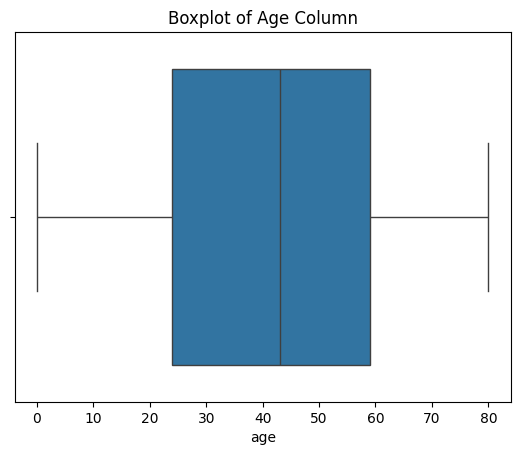

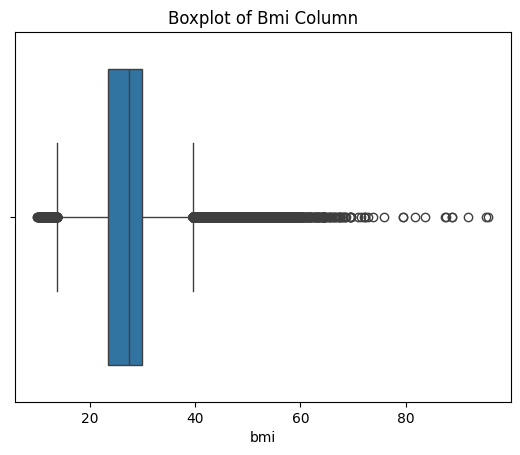

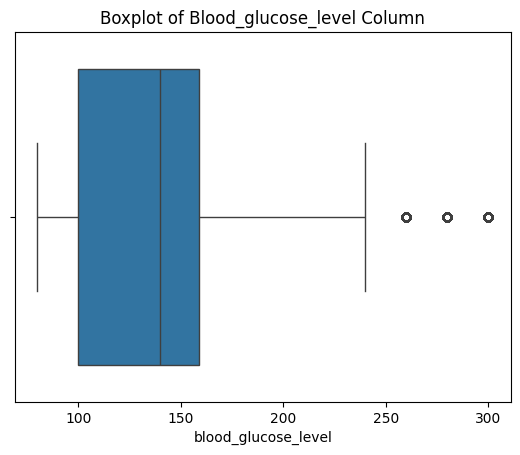

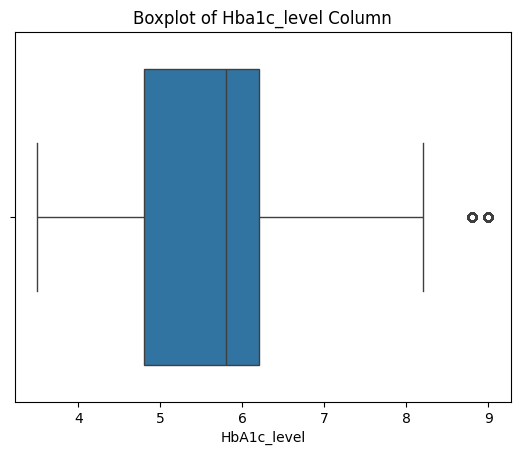

In [19]:
# check for outliers in the columns
# Gnerate boxplots
for column in selected_columns:
  sns.boxplot(x=df[column])
  plt.title("Boxplot of " + column.capitalize() + " Column")
  plt.show()
  print("\n"*5)


In [20]:
# Define the columns to check for outliers
selected_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Function to count the number of outliers in each column using IQR method
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Count the number of outliers for each selected column
outliers_count = {column: count_outliers(df, column) for column in selected_columns}
outliers_count

{'age': 0,
 'hypertension': 7461,
 'heart_disease': 3923,
 'bmi': 5354,
 'HbA1c_level': 1312,
 'blood_glucose_level': 2031,
 'diabetes': 8482}

In [ ]:
# descriptive statistics that summarize the central tendency, dispersion,

description = df[selected_columns].describe()
description

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [21]:
diabetes_df = df[df['diabetes'].isin([1])]

In [22]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1


In [23]:
diabetes_df = df[df['diabetes'].isin([ 1])]
diabetes_description = diabetes_df[selected_columns].describe()
diabetes_description

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.0
mean,60.925961,0.245933,0.149375,31.997755,6.934827,194.026173,1.0
std,14.545301,0.430664,0.356479,7.563494,1.076462,58.630047,0.0
min,3.000000,0.000000,0.000000,10.980000,5.700000,126.000000,1.0
25%,52.000000,0.000000,0.000000,27.320000,6.100000,145.000000,1.0
50%,62.000000,0.000000,0.000000,29.985000,6.600000,160.000000,1.0
75%,72.000000,0.000000,0.000000,35.940000,7.500000,240.000000,1.0
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.0


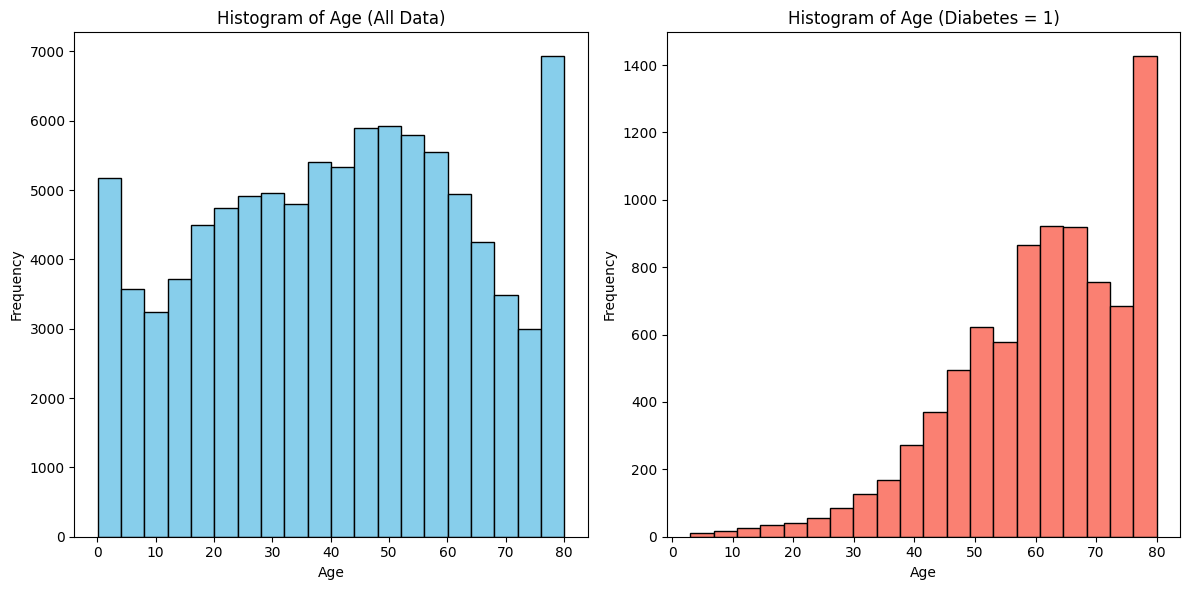

In [24]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'age' column in the original DataFrame
axs[0].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Age (All Data)')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Plot histogram for 'age' column in the DataFrame with diabetes values 1
axs[1].hist(diabetes_df['age'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Age (Diabetes = 1)')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

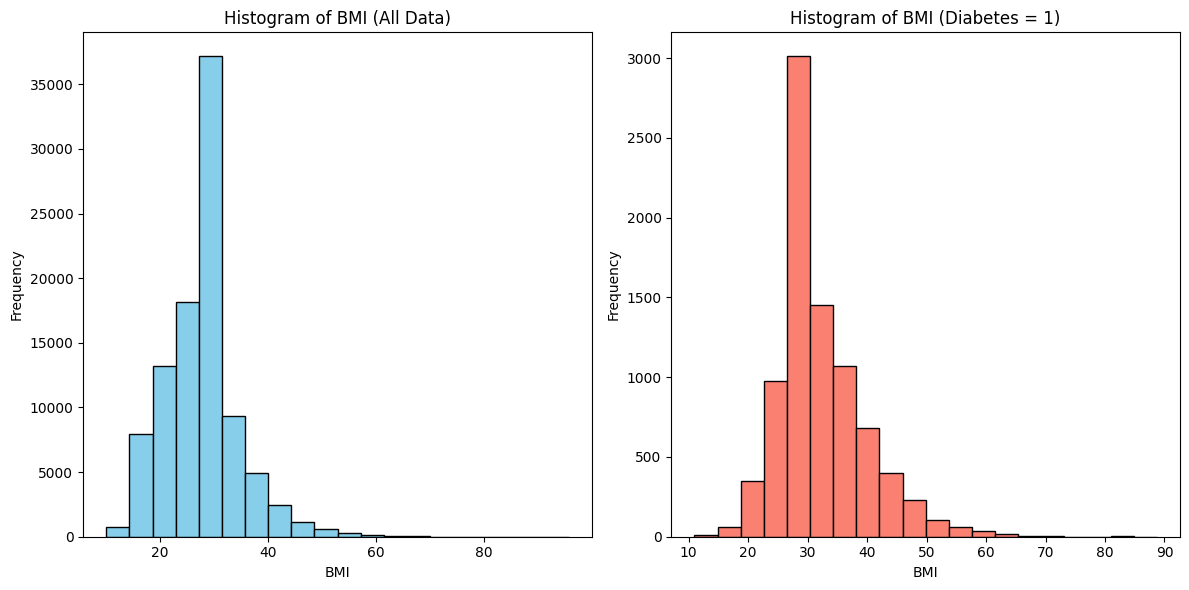

In [25]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'age' column in the original DataFrame
axs[0].hist(df['bmi'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of BMI (All Data)')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Frequency')

# Plot histogram for 'age' column in the DataFrame with diabetes values 0 or 1
axs[1].hist(diabetes_df['bmi'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of BMI (Diabetes = 1)')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

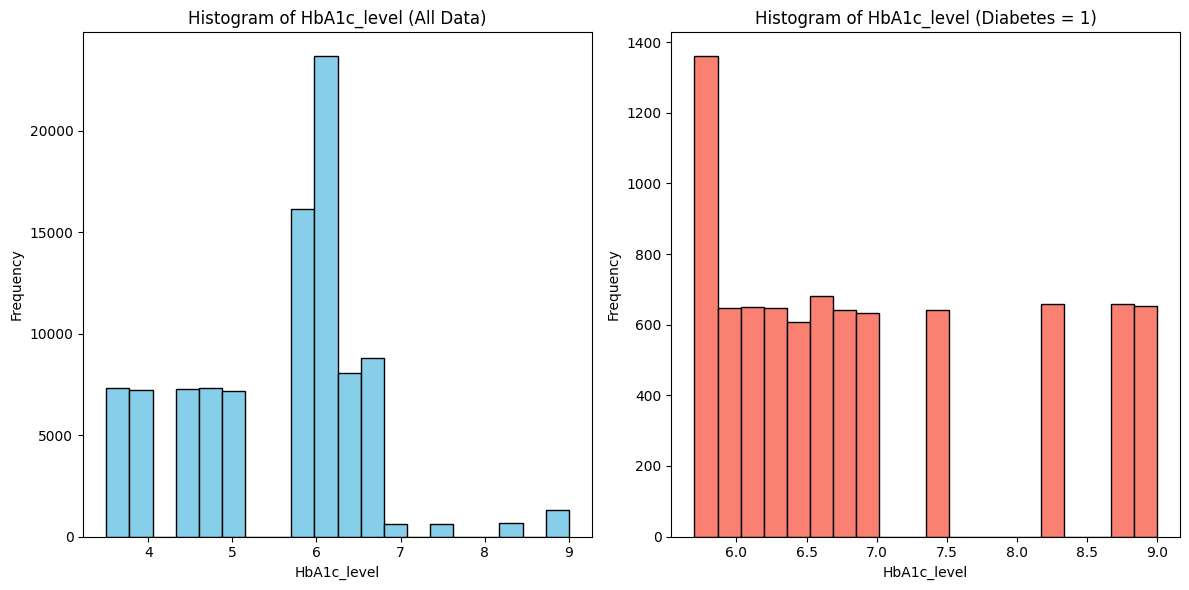

In [26]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'age' column in the original DataFrame
axs[0].hist(df['HbA1c_level'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of HbA1c_level (All Data)')
axs[0].set_xlabel('HbA1c_level')
axs[0].set_ylabel('Frequency')

# Plot histogram for 'age' column in the DataFrame with diabetes values 0 or 1
axs[1].hist(diabetes_df['HbA1c_level'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of HbA1c_level (Diabetes = 1)')
axs[1].set_xlabel('HbA1c_level')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

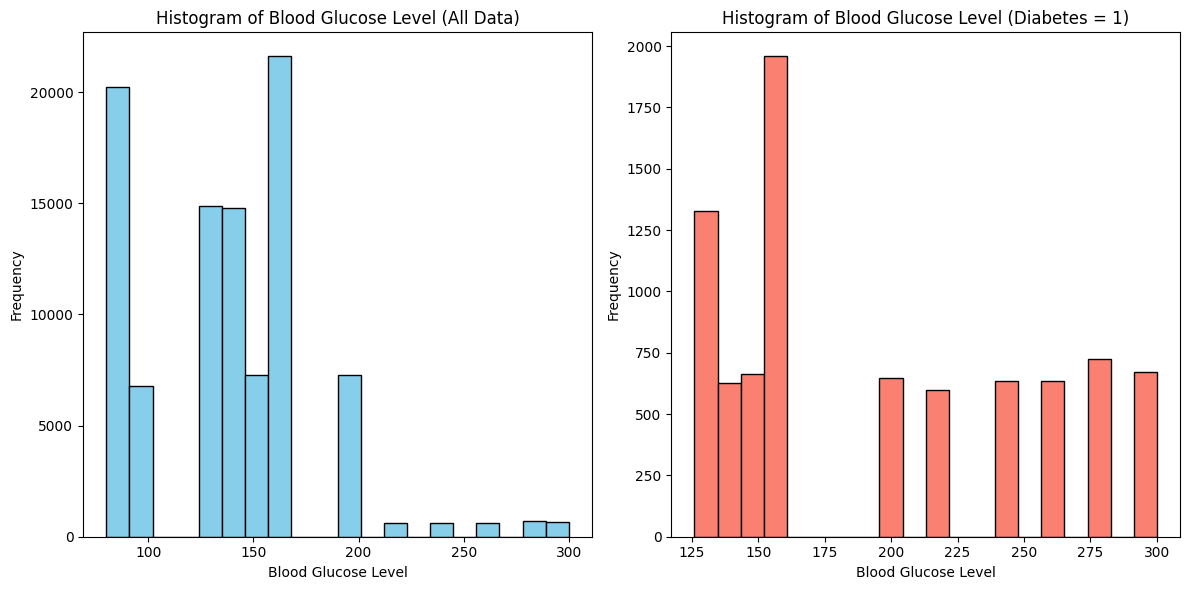

In [27]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'age' column in the original DataFrame
axs[0].hist(df['blood_glucose_level'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Blood Glucose Level (All Data)')
axs[0].set_xlabel('Blood Glucose Level')
axs[0].set_ylabel('Frequency')

# Plot histogram for 'age' column in the DataFrame with diabetes values 0 or 1
axs[1].hist(diabetes_df['blood_glucose_level'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Blood Glucose Level (Diabetes = 1)')
axs[1].set_xlabel('Blood Glucose Level')
axs[1].set_ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()

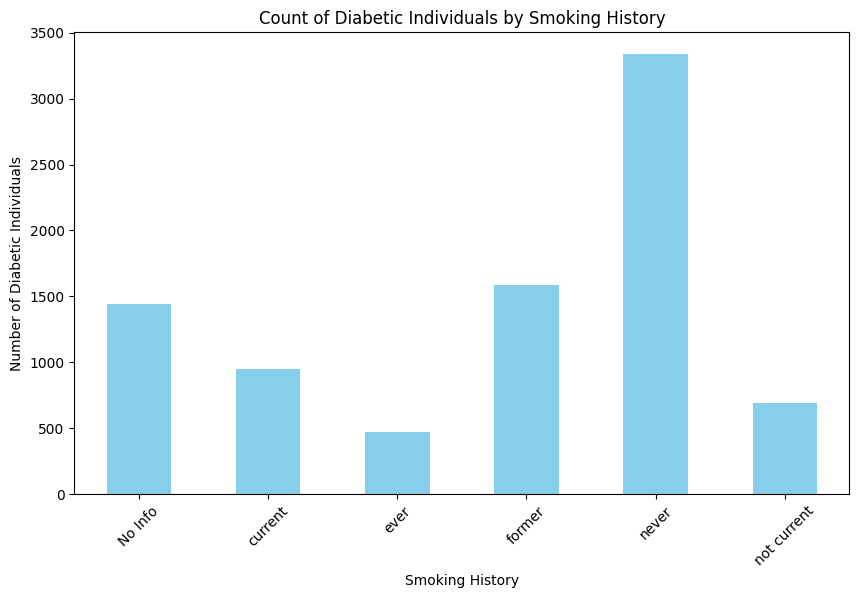

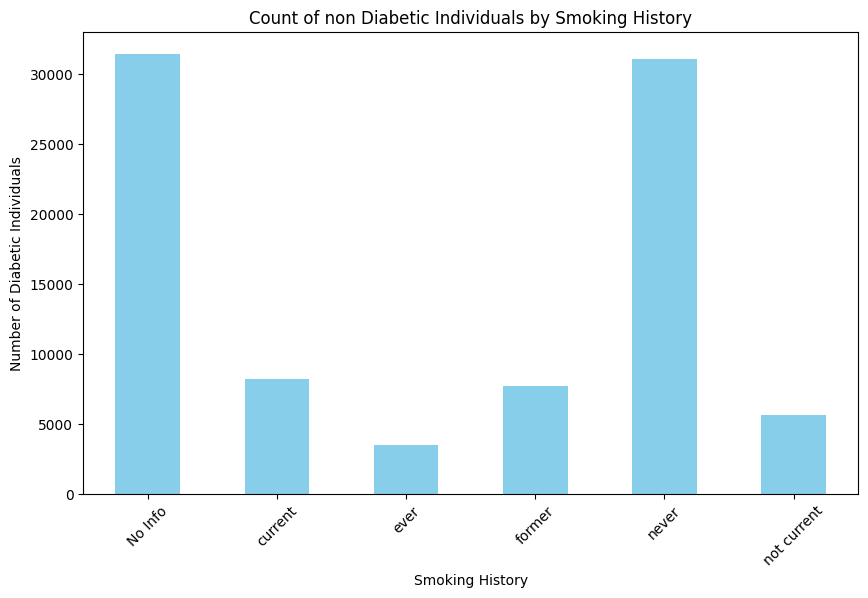

In [28]:
# Filter the DataFrame for individuals with diabetes
diabetic_df = df[df['diabetes'] == 1]

# Group the filtered data by 'smoking_history' and count the number of diabetic individuals
smoking_diabetic_count = diabetic_df.groupby('smoking_history').size()

# Plot the data
plt.figure(figsize=(10, 6))
smoking_diabetic_count.plot(kind='bar', color='skyblue')
plt.title('Count of Diabetic Individuals by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Number of Diabetic Individuals')
plt.xticks(rotation=45)
plt.show()

# Filter the DataFrame for individuals with no diabetes
non_diabetic_df = df[df['diabetes'] == 0]

# Group the filtered data by 'smoking_history' and count the number of diabetic individuals
smoking_diabetic_count = non_diabetic_df.groupby('smoking_history').size()

# Plot the data
plt.figure(figsize=(10, 6))
smoking_diabetic_count.plot(kind='bar', color='skyblue')
plt.title('Count of non Diabetic Individuals by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Number of Diabetic Individuals')
plt.xticks(rotation=45)
plt.show()


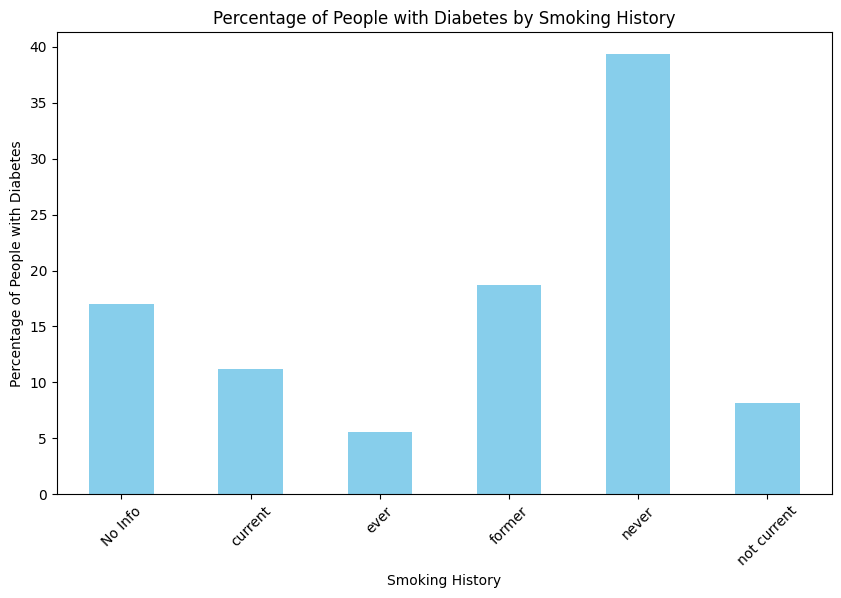

In [29]:
# Calculate the total number of people with diabetes
total_diabetes = df['diabetes'].sum()

# Group the data by 'smoking_history' and calculate the percentage of people with diabetes in each category
smoking_diabetes_percentage = df.groupby('smoking_history')['diabetes'].sum() / total_diabetes * 100

# Plot the data
plt.figure(figsize=(10, 6))
smoking_diabetes_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of People with Diabetes by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Percentage of People with Diabetes')
plt.xticks(rotation=45)
plt.show()


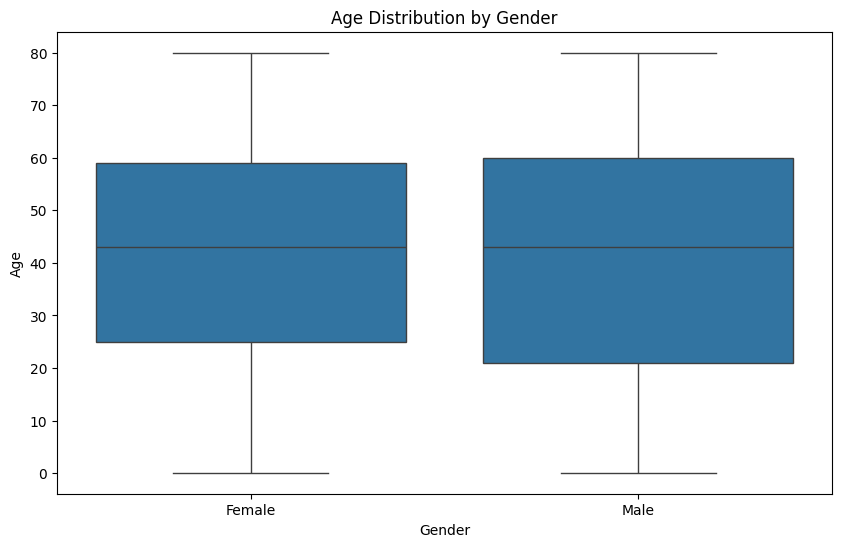

In [30]:
# Age Distribution by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

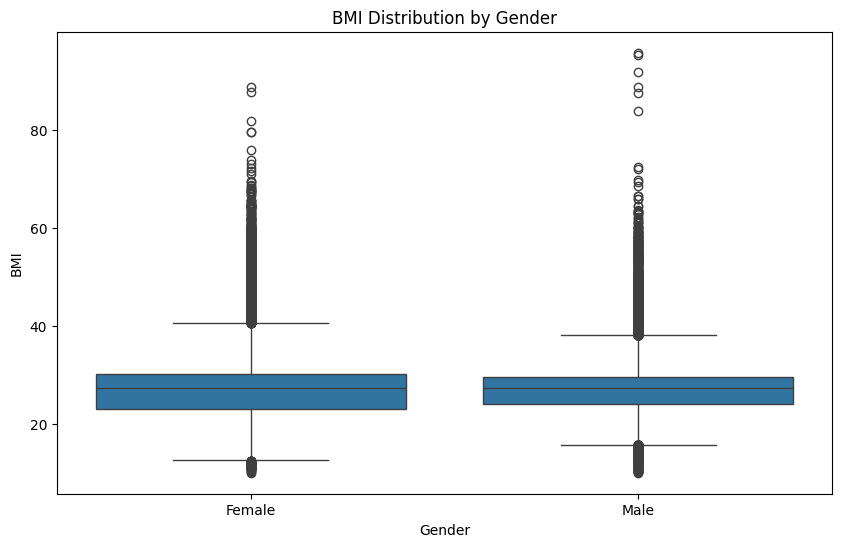

In [31]:
# BMI Distribution by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

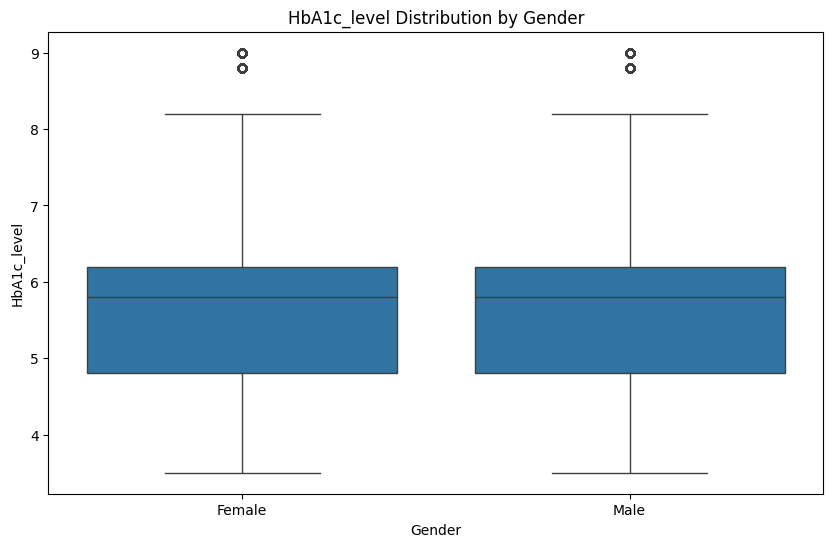

In [32]:
# HbA1c_level Distribution by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='HbA1c_level', data=df)
plt.title('HbA1c_level Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('HbA1c_level')
plt.show()

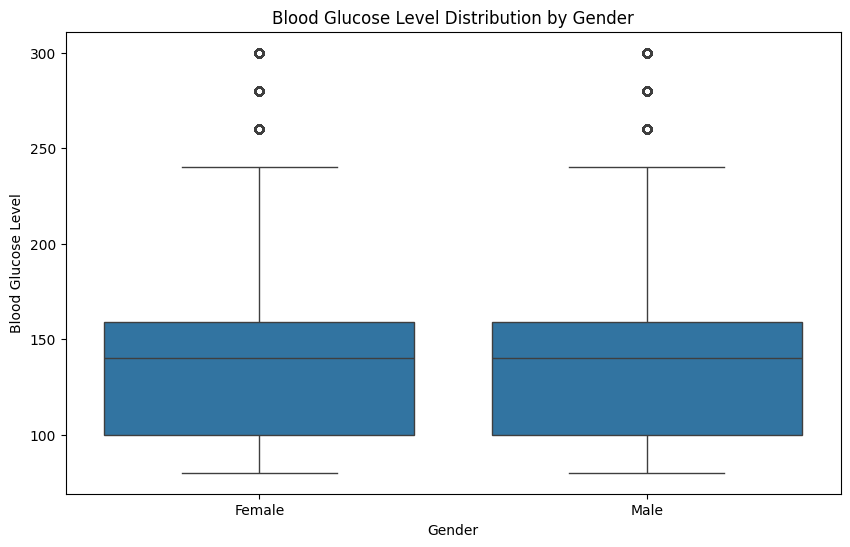

In [33]:
# blood_glucose_level Distribution by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Blood Glucose Level')
plt.show()

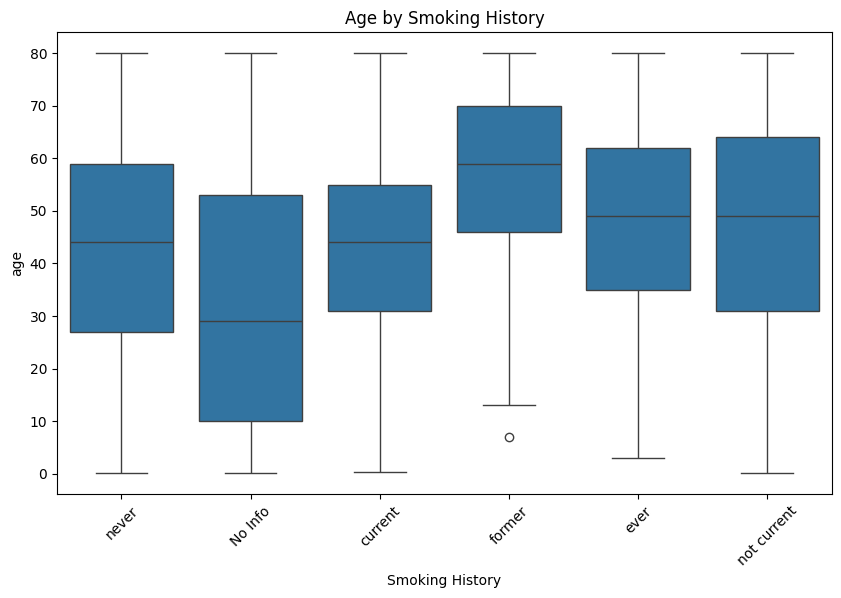

In [34]:
# age by smoking history

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='age', data=df)
plt.title('Age by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('age')
plt.xticks(rotation=45)
plt.show()

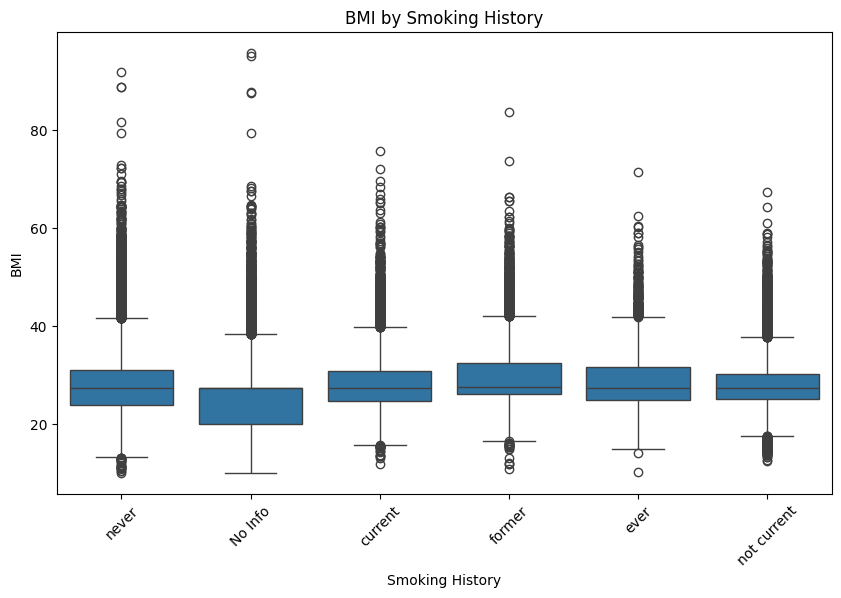

In [35]:
# BMI by Smoking History

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='bmi', data=df)
plt.title('BMI by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

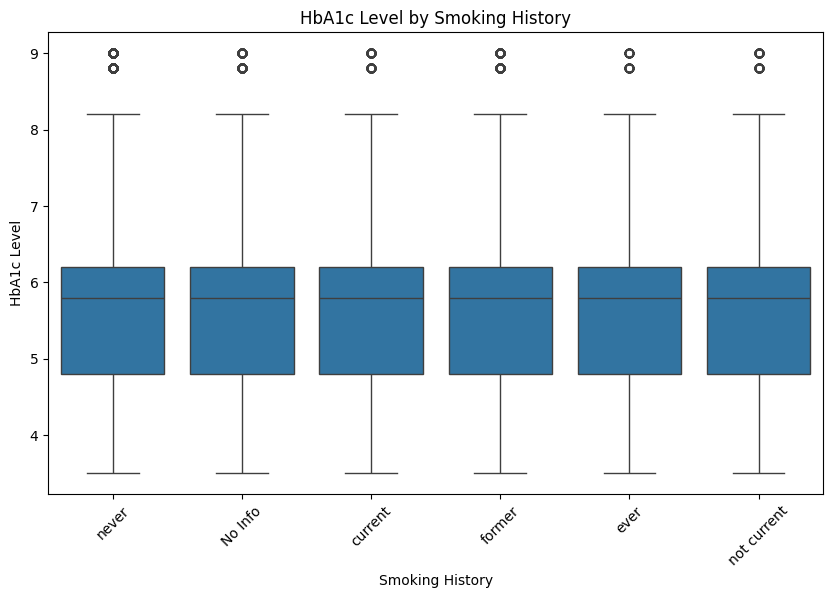

In [36]:
# HbA1c Level by Smoking History

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='HbA1c_level', data=df)
plt.title('HbA1c Level by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('HbA1c Level')
plt.xticks(rotation=45)
plt.show()

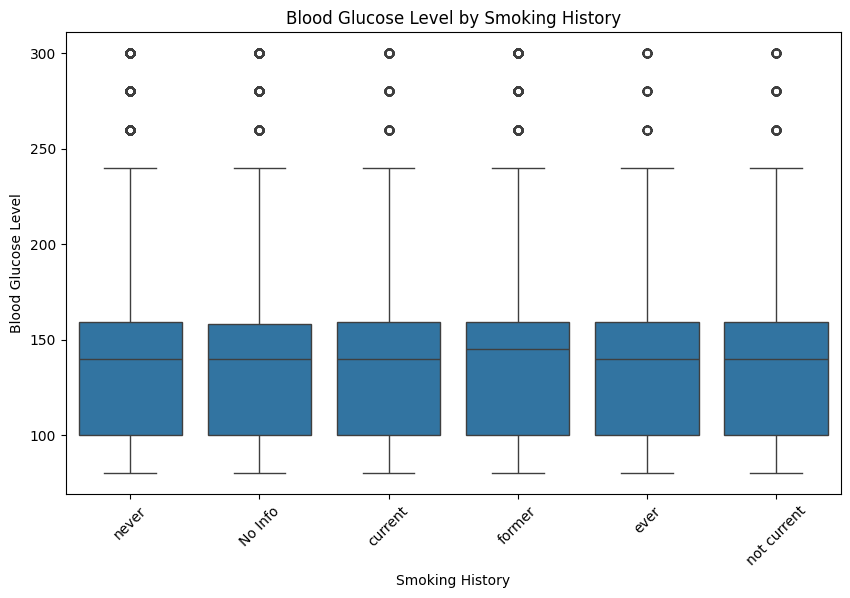

In [37]:
# Blood Glucose Level by Smoking History

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Blood Glucose Level')
plt.xticks(rotation=45)
plt.show()

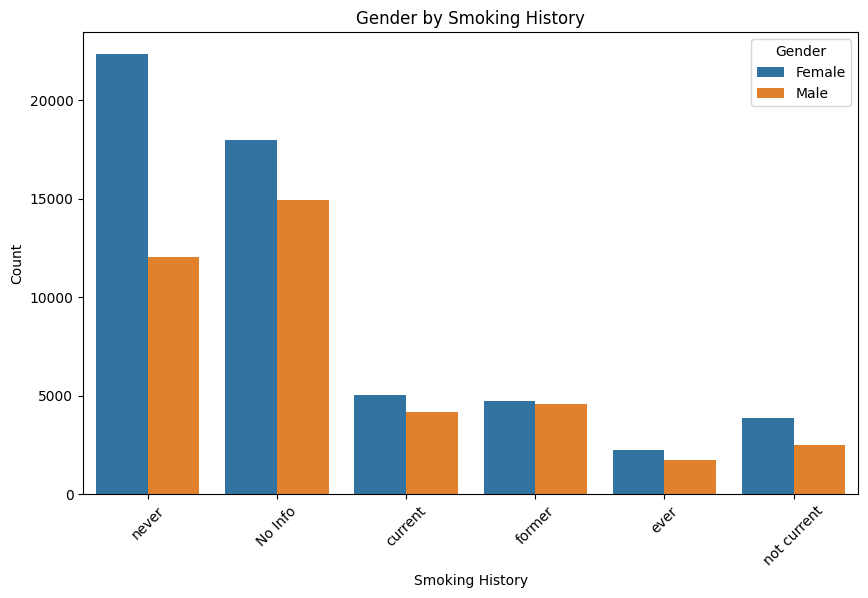

In [38]:
# Gender by Smoking History

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='gender', data=df)
plt.title('Gender by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [39]:
new_df = df[selected_columns].copy()
new_df['diabetes'] = df['diabetes']
corr_matrix = new_df.corr()
corr_matrix['diabetes'].sort_values(ascending=False)

,diabetes
diabetes,1.000000
blood_glucose_level,0.424366
HbA1c_level,0.406446
age,0.264918
bmi,0.214951
hypertension,0.195696
heart_disease,0.170701


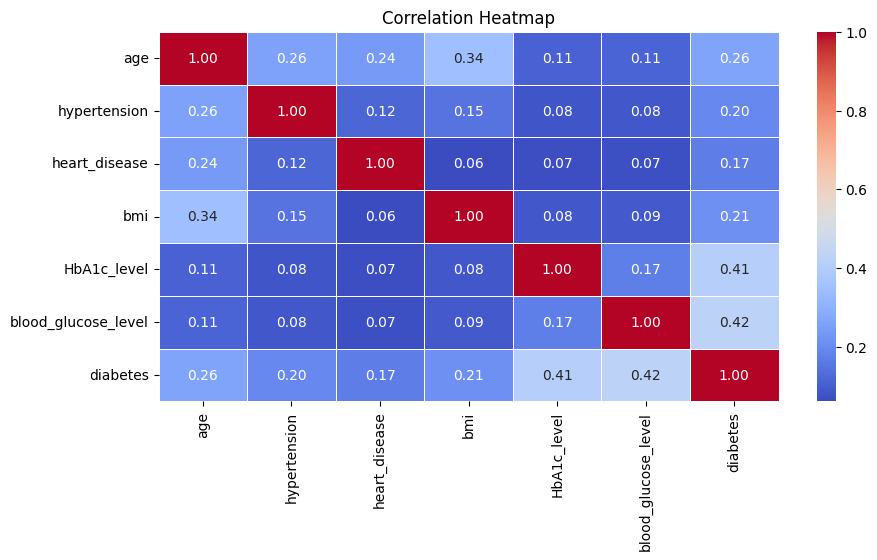

In [40]:
# Create a heatmap of the correlation matrix
corr_matrix = df.corr(numeric_only=True)

plt.figure().set_figwidth(10,8)
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Machine Learning Pre-Processing

In [41]:
# Convert 'gender' column to binary (0, 1) using lambda function

df['gender'] = df['gender'].map(lambda x: 0 if x == 'Female' else 1)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [42]:
# Define a function to convert smoking history to binary format

def convert_smoking_history(value):
    if value in ['current', 'ever', 'former']:
        return 1  # Smoker
    elif value in ['never', 'No Info', 'not current']:
        return 0  # Non-smoker
    else:
        return None

# Apply the function to the smoking_history column
df['smoking_history'] = df['smoking_history'].apply(convert_smoking_history)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [43]:
# Split data into features and target

x = df.drop('diabetes', axis=1)
y = df['diabetes']

print('Features', x,'\n')
print('Target', y)

Features        gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                0  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                0  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                0  24.60   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                1  27.83   
99998       0  24.0             0              0                0  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  

In [44]:
# Split the data into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
# Standardize the feature values

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Apply Machine Learning Models to Imbalanced Data

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr

Best parameters for Logistic Regression: {'C': 0.08233797718320979, 'penalty': 'l2', 'solver': 'sag'}
Best score for Logistic Regression: 0.9591297810642198
Logistic Regression Test Accuracy: 0.9573494226568189


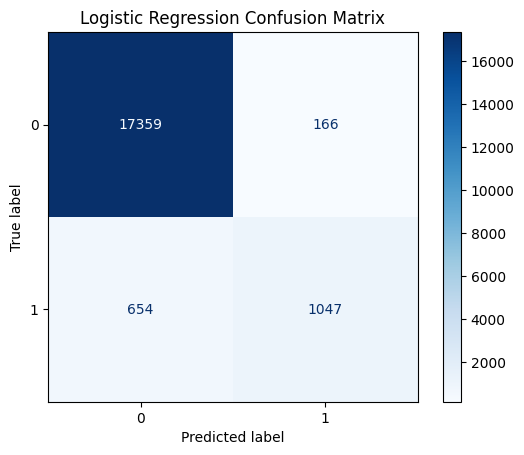


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.86      0.62      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.91      0.80      0.85     19226
weighted avg       0.95      0.96      0.95     19226



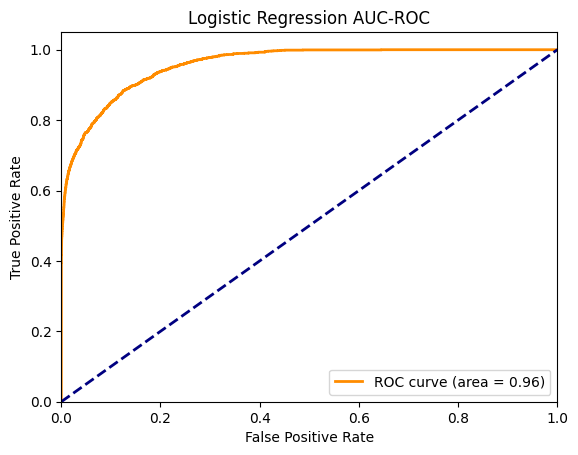


 
 Execution time: 7.657495021820068 seconds


In [46]:
# 1. The logistic Regression Model

# Start time
start_time = time.time()

# Logistic Regression model with hyperparameter tuning using RandomizedSearchCV
log_reg_model = LogisticRegression(max_iter=10000)
param_dist = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

random_search = RandomizedSearchCV(log_reg_model, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

# Best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression:", random_search.best_params_)
print("Best score for Logistic Regression:", random_search.best_score_)

# Evaluate the best Logistic Regression model on the test set
best_log_reg_model = random_search.best_estimator_
log_reg_y_pred = best_log_reg_model.predict(x_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, log_reg_y_pred))

# Confusion matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_y_pred)
log_reg_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm)

# Plot absolute confusion matrix with blue colormap
log_reg_disp.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_y_pred))

# Predicted probabilities for the positive class (used for AUC-ROC)
log_reg_y_prob = best_log_reg_model.predict_proba(x_test)[:, 1]

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression AUC-ROC')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 4}
Best score for Decision Tree: 0.9711320715634754
Decision Tree Test Accuracy: 0.9692603765733901


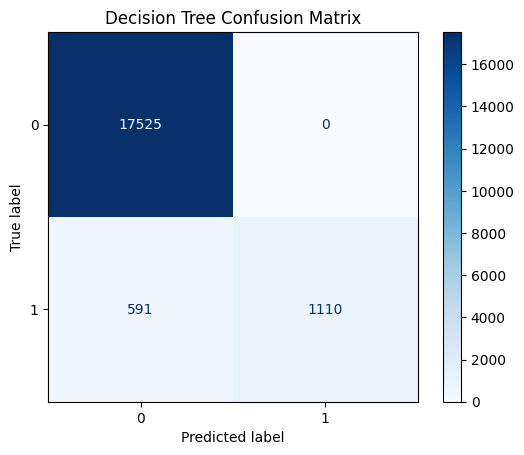


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       1.00      0.65      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



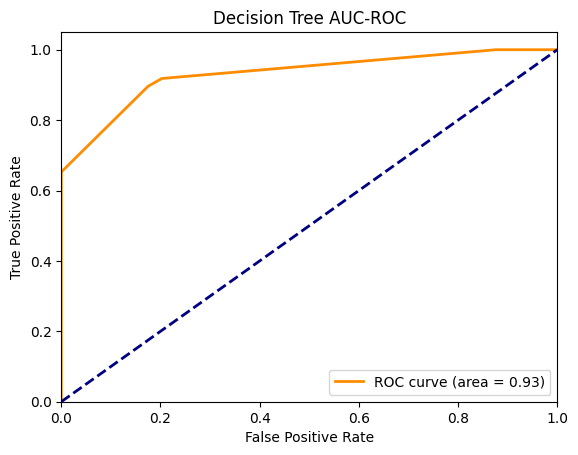


 
 Execution time: 4.345879077911377 seconds


In [47]:
# 2. Decision Tree Model

# Start time
start_time = time.time()

# Decision Tree model with hyperparameter tuning using RandomizedSearchCV
dt_model = DecisionTreeClassifier()
dt_param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

dt_random_search = RandomizedSearchCV(dt_model, dt_param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
dt_random_search.fit(x_train, y_train)

# Best parameters and score for Decision Tree
print("Best parameters for Decision Tree:", dt_random_search.best_params_)
print("Best score for Decision Tree:", dt_random_search.best_score_)

# Evaluate the best Decision Tree model on the test set
best_dt_model = dt_random_search.best_estimator_
dt_y_pred = best_dt_model.predict(x_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, dt_y_pred))

# Confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)

# Plot absolute confusion matrix with blue colormap
dt_disp.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Classification report for Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Predicted probabilities for the positive class (used for AUC-ROC)
dt_y_prob = best_dt_model.predict_proba(x_test)[:, 1]

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree AUC-ROC')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')




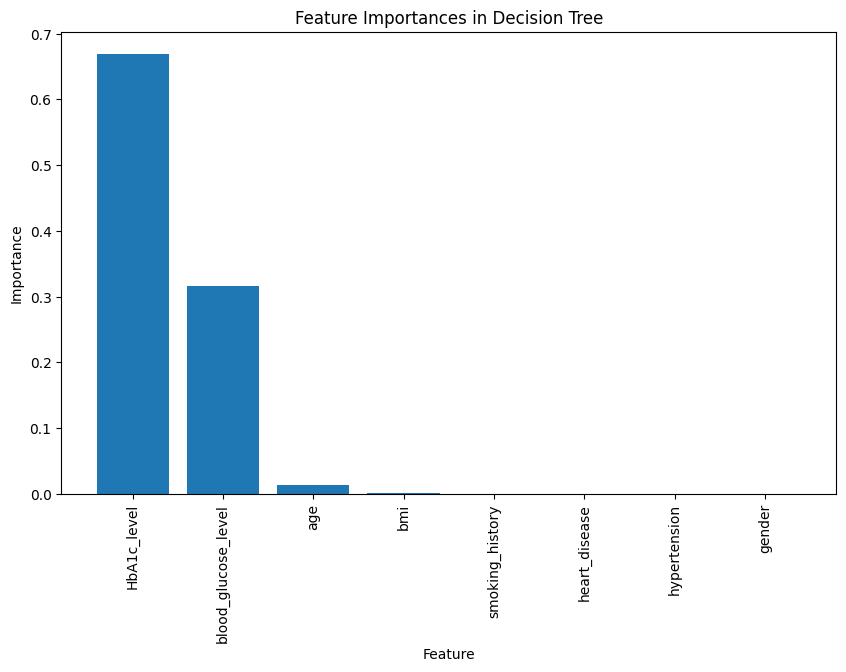

In [48]:
# Feature importances from the Decision Tree
feature_importances = best_dt_model.feature_importances_

# Plotting feature importances
feature_names = df.drop('diabetes', axis=1).columns
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(x_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.show()

Original number of features: 8
Reduced number of features: 2
Decision Tree Test Accuracy with selected features: 0.9719561354080881


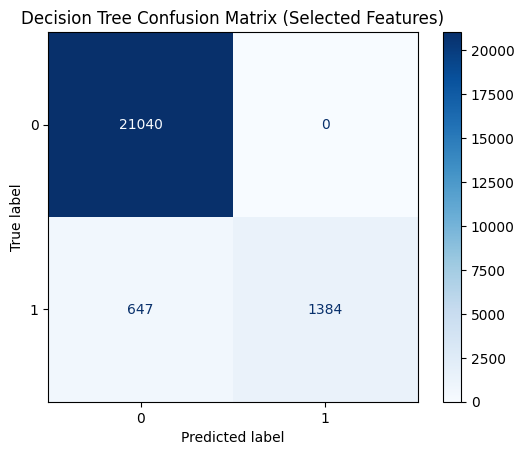


Decision Tree Classification Report with Selected Features:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21040
           1       1.00      0.68      0.81      2031

    accuracy                           0.97     23071
   macro avg       0.99      0.84      0.90     23071
weighted avg       0.97      0.97      0.97     23071



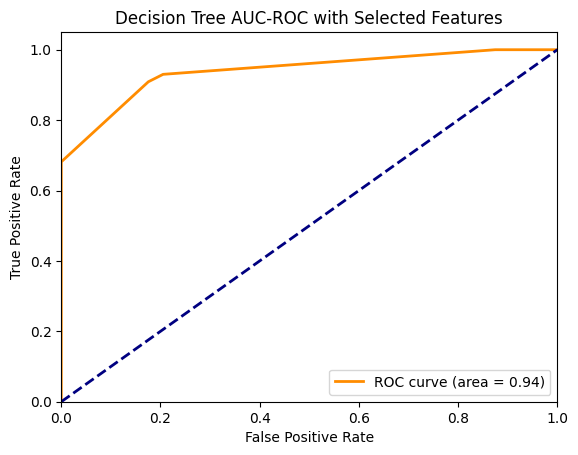


 
 Execution time: 0.6976180076599121 seconds


In [49]:
# Decision Tree with selected features

# Start time
start_time = time.time()

# Feature selection using feature importances from the Decision Tree
model = SelectFromModel(best_dt_model, prefit=True)
X_new = model.transform(x_train)

print("Original number of features:", x_train.shape[1])
print("Reduced number of features:", X_new.shape[1])

# Optional: Re-train the model on the selected features
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
best_dt_model.fit(X_train_new, y_train_new)
dt_y_pred_new = best_dt_model.predict(X_test_new)
print("Decision Tree Test Accuracy with selected features:", accuracy_score(y_test_new, dt_y_pred_new))

# Confusion matrix for Decision Tree with selected features
dt_cm_new = confusion_matrix(y_test_new, dt_y_pred_new)
dt_disp_new = ConfusionMatrixDisplay(confusion_matrix=dt_cm_new)

# Plot absolute confusion matrix with blue colormap
dt_disp_new.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree Confusion Matrix (Selected Features)")
plt.show()

# Classification report for Decision Tree with selected features
print("\nDecision Tree Classification Report with Selected Features:")
print(classification_report(y_test_new, dt_y_pred_new))

# Predicted probabilities for the positive class (used for AUC-ROC)
dt_y_prob_new = best_dt_model.predict_proba(X_test_new)[:, 1]

# AUC-ROC Curve with selected features
fpr_new, tpr_new, thresholds_new = roc_curve(y_test_new, dt_y_prob_new)
roc_auc_new = auc(fpr_new, tpr_new)

plt.figure()
plt.plot(fpr_new, tpr_new, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_new:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree AUC-ROC with Selected Features')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 124}
Best score for Random Forest: 0.9710670537485282
Random Forest Test Accuracy: 0.9692603765733901


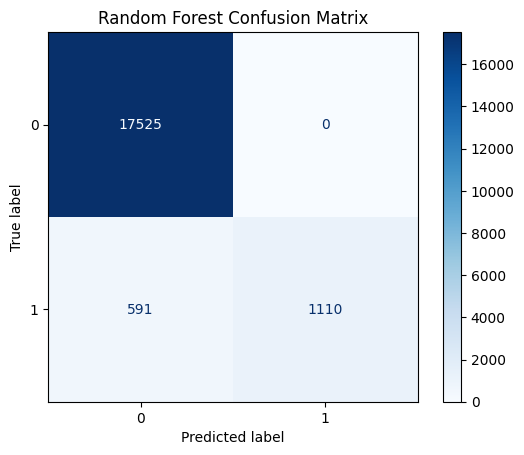


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       1.00      0.65      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



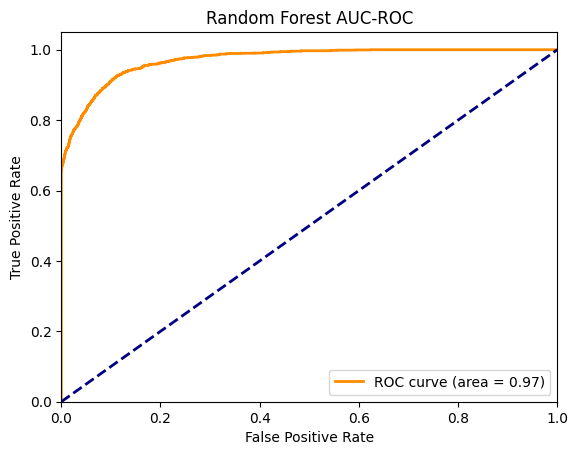


 
 Execution time: 220.89580726623535 seconds


In [50]:
# 3. Random Forest model

# Start time
start_time = time.time()

RFC_model = RandomForestClassifier()
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(RFC_model, rf_param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
rf_random_search.fit(x_train, y_train)


# Best parameters and score for Random Forest
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best score for Random Forest:", rf_random_search.best_score_)

# Evaluate the best Random Forest model on the test set
best_rf_model = rf_random_search.best_estimator_
rf_y_pred = best_rf_model.predict(x_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_y_pred))


# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)


# Plot absolute confusion matrix with blue colormap
rf_disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Predicted probabilities for the positive class (used for AUC-ROC)
rf_y_prob = best_rf_model.predict_proba(x_test)[:, 1]

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest AUC-ROC')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 10, 'metric': 'manhattan'}
Best score for KNN: 0.9619255690887097
KNN Test Accuracy: 0.960834286903152


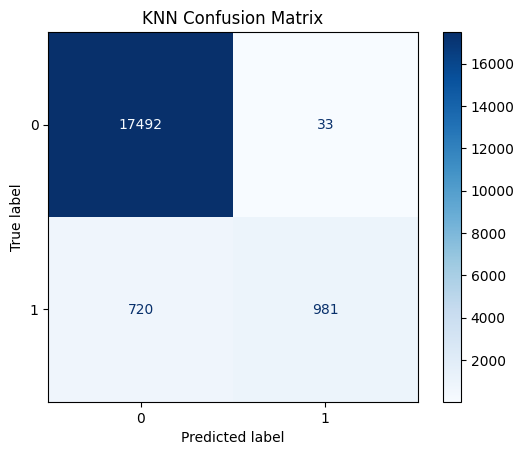


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17525
           1       0.97      0.58      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.96      0.79      0.85     19226
weighted avg       0.96      0.96      0.96     19226



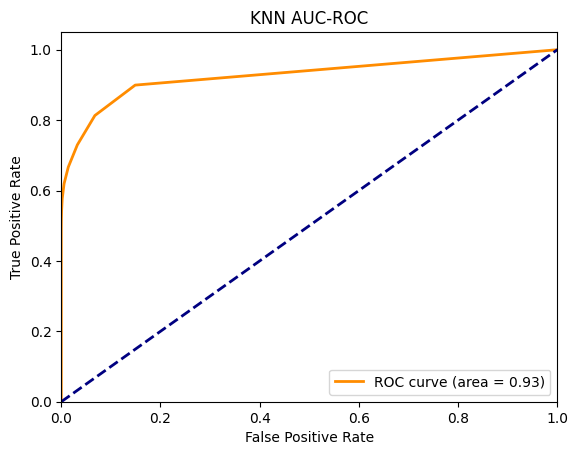


 
 Execution time: 152.88496780395508 seconds


In [51]:
# 4. KNN Model

# Start time
start_time = time.time()

# KNN model with hyperparameter tuning using RandomSearch
knn_model = KNeighborsClassifier()
knn_param_dist = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid_search = RandomizedSearchCV(knn_model, knn_param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state = 42)
knn_grid_search.fit(x_train, y_train)

# Best parameters and score for KNN
print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best score for KNN:", knn_grid_search.best_score_)

# Evaluate the best KNN model on the test set
best_knn_model = knn_grid_search.best_estimator_
knn_y_pred = best_knn_model.predict(x_test)
print("KNN Test Accuracy:", accuracy_score(y_test, knn_y_pred))

# Confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_disp.plot(cmap='Blues', values_format='d')
plt.title("KNN Confusion Matrix")
plt.show()

# Classification report for Random Forest
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

# Predicted probabilities for the positive class (used for AUC-ROC)
knn_y_prob = best_knn_model.predict_proba(x_test)[:, 1]

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN AUC-ROC')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')

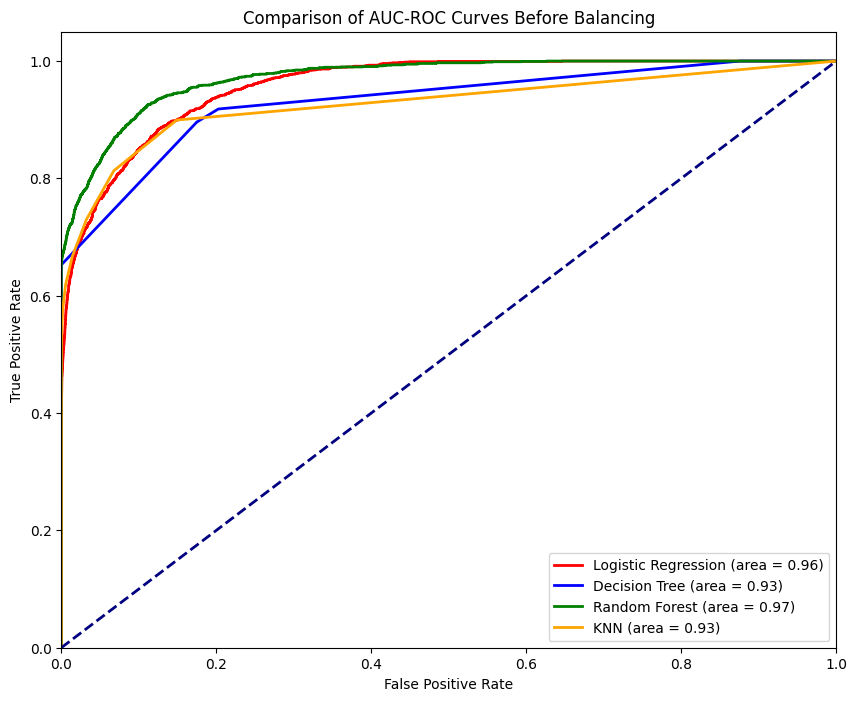

In [52]:
# Calculate ROC curve points
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_y_prob)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_y_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_y_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot all ROC curves on one plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, color='red', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_log)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of AUC-ROC Curves Before Balancing')
plt.legend(loc="lower right")
plt.show()


In [53]:
# Best Model Performance Summary
best_model_name = "Random Forest"
best_model_auc = 0.97
best_model_parameters = {
    'n_estimators': 150,  # Example value, replace with your actual best value
    'max_depth': 30,      # Example value, replace with your actual best value
    'min_samples_split': 2,  # Example value, replace with your actual best value
    'min_samples_leaf': 1,   # Example value, replace with your actual best value
    'bootstrap': True        # Example value, replace with your actual best value
}

# Print the summary
print(f"The best performing model is the {best_model_name} with an AUC-ROC of {best_model_auc:.2f}.")
print("The best parameters for the model were:")
for param, value in best_model_parameters.items():
    print(f"  {param}: {value}")


The best performing model is the Random Forest with an AUC-ROC of 0.97.
The best parameters for the model were:
  n_estimators: 150
  max_depth: 30
  min_samples_split: 2
  min_samples_leaf: 1
  bootstrap: True


# Apply the SMOTE algorithm to address the imbalance

In [54]:
# Since we have imbalanced data, we chose to apply the SMOTE algorithm.
# Reference : https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

print('Count before over-sampling', Counter(y))
print('Count after over-sampling', Counter(y_smote))

Count before over-sampling Counter({0: 87646, 1: 8482})
Count after over-sampling Counter({0: 87646, 1: 87646})


In [55]:

# Split the data into training and test datasets

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

print('The x_train shape', x_train.shape)
print('The x_test shape',x_test.shape)
print('The y_train shape',y_train.shape)
print('The y_test shape',y_test.shape)


The x_train shape (140233, 8)
The x_test shape (35059, 8)
The y_train shape (140233,)
The y_test shape (35059,)


# Apply Machine Learning Models to Balanced Data

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr

Best parameters for Logistic Regression: {'C': 0.08233797718320979, 'penalty': 'l2', 'solver': 'sag'}
Best score for Logistic Regression: 0.8854406612187204
Logistic Regression Test Accuracy: 0.8882455289654583


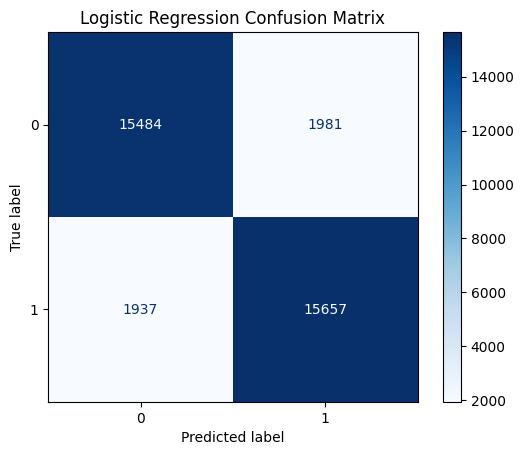


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     17465
           1       0.89      0.89      0.89     17594

    accuracy                           0.89     35059
   macro avg       0.89      0.89      0.89     35059
weighted avg       0.89      0.89      0.89     35059



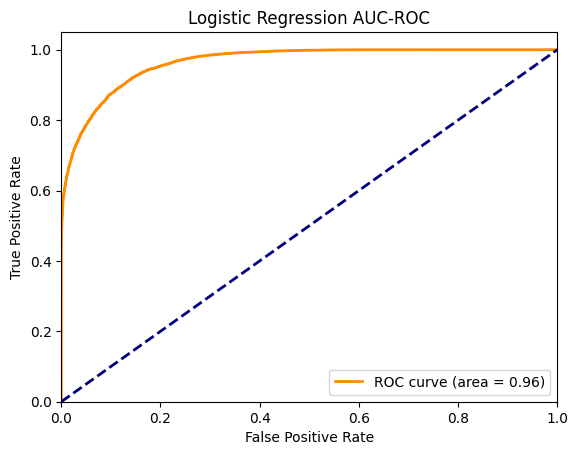


 
 Execution time: 399.2916784286499 seconds


In [56]:
# 1. The logistic Regression Model

# Start time
start_time = time.time()


# Logistic Regression model with hyperparameter tuning using RandomizedSearchCV
log_reg_model = LogisticRegression(max_iter=10000)
param_dist = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

random_search = RandomizedSearchCV(log_reg_model, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

# Best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression:", random_search.best_params_)
print("Best score for Logistic Regression:", random_search.best_score_)

# Evaluate the best Logistic Regression model on the test set
best_log_reg_model = random_search.best_estimator_
log_reg_y_pred = best_log_reg_model.predict(x_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, log_reg_y_pred))

# Confusion matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_y_pred)
log_reg_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm)

# Plot absolute confusion matrix with blue colormap
log_reg_disp.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_y_pred))

# Predicted probabilities for the positive class (used for AUC-ROC)
log_reg_y_prob = best_log_reg_model.predict_proba(x_test)[:, 1]

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression AUC-ROC')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 17}
Best score for Decision Tree: 0.9590681022404702
Decision Tree Test Accuracy: 0.9602955018682792


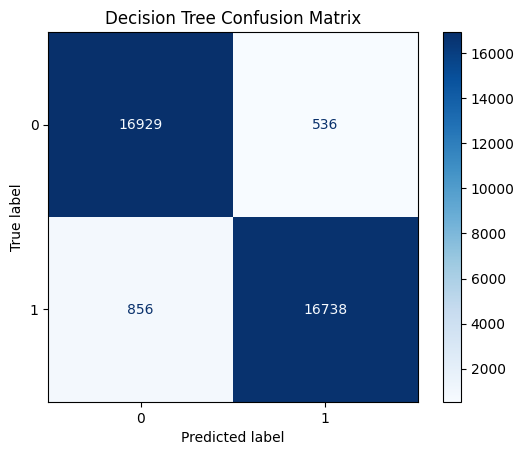


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17465
           1       0.97      0.95      0.96     17594

    accuracy                           0.96     35059
   macro avg       0.96      0.96      0.96     35059
weighted avg       0.96      0.96      0.96     35059



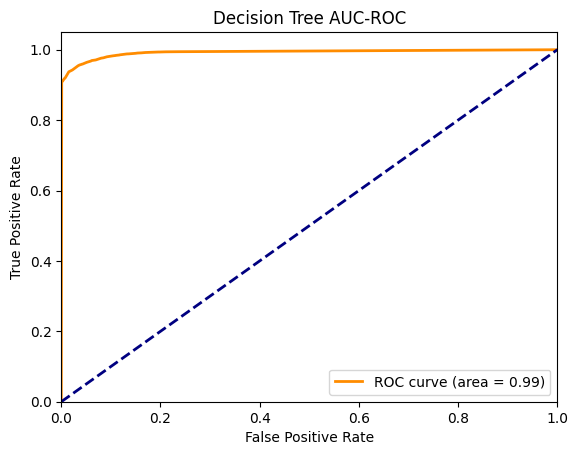


 
 Execution time: 10.615315675735474 seconds


In [57]:
# 2. Decision Tree Model

# Start time
start_time = time.time()


# Decision Tree model with hyperparameter tuning using RandomizedSearchCV
dt_model = DecisionTreeClassifier()
dt_param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

dt_random_search = RandomizedSearchCV(dt_model, dt_param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
dt_random_search.fit(x_train, y_train)

# Best parameters and score for Decision Tree
print("Best parameters for Decision Tree:", dt_random_search.best_params_)
print("Best score for Decision Tree:", dt_random_search.best_score_)

# Evaluate the best Decision Tree model on the test set
best_dt_model = dt_random_search.best_estimator_
dt_y_pred = best_dt_model.predict(x_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, dt_y_pred))

# Confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)

# Plot absolute confusion matrix with blue colormap
dt_disp.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Classification report for Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Predicted probabilities for the positive class (used for AUC-ROC)
dt_y_prob = best_dt_model.predict_proba(x_test)[:, 1]

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree AUC-ROC')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')


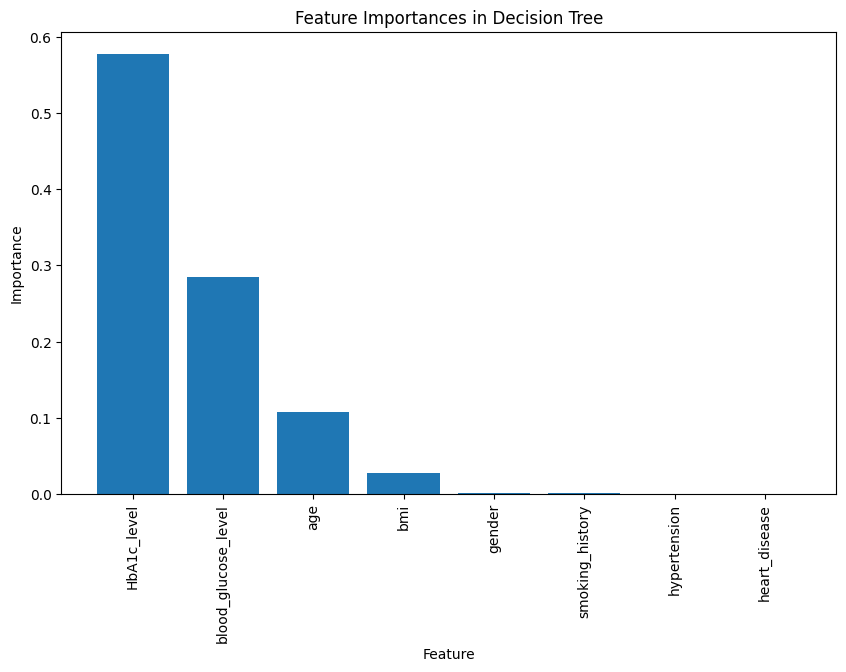

In [58]:
# Feature importances from the Decision Tree
feature_importances = best_dt_model.feature_importances_

# Plotting feature importances
feature_names = df.drop('diabetes', axis=1).columns
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(x_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original number of features: 8
Reduced number of features: 2
Decision Tree Test Accuracy with selected features: 0.960684573330164


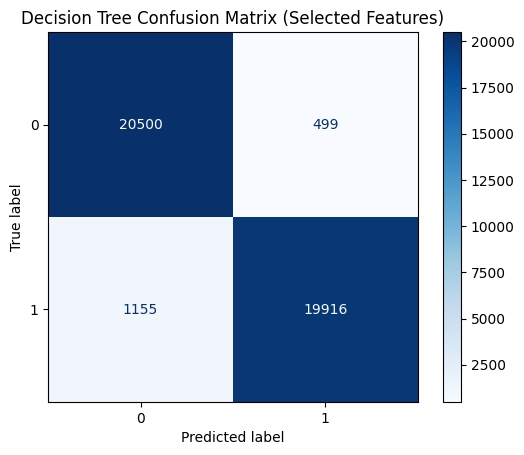


Decision Tree Classification Report with Selected Features:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     20999
           1       0.98      0.95      0.96     21071

    accuracy                           0.96     42070
   macro avg       0.96      0.96      0.96     42070
weighted avg       0.96      0.96      0.96     42070



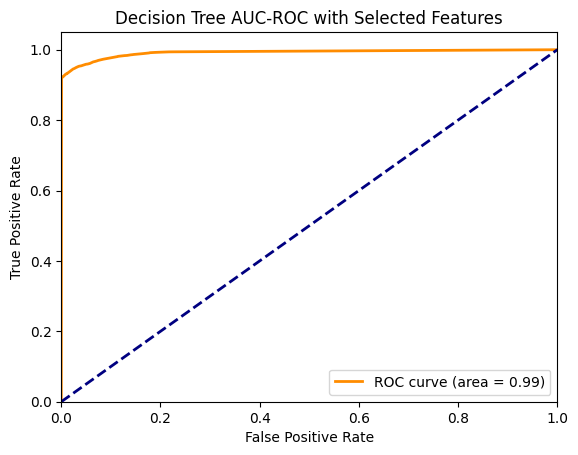


 
 Execution time: 0.7444016933441162 seconds


In [59]:
# Start time
start_time = time.time()


# Feature selection using feature importances from the Decision Tree
model = SelectFromModel(best_dt_model, prefit=True)
X_new = model.transform(x_train)

print("Original number of features:", x_train.shape[1])
print("Reduced number of features:", X_new.shape[1])

# Optional: Re-train the model on the selected features
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
best_dt_model.fit(X_train_new, y_train_new)
dt_y_pred_new = best_dt_model.predict(X_test_new)
print("Decision Tree Test Accuracy with selected features:", accuracy_score(y_test_new, dt_y_pred_new))

# Confusion matrix for Decision Tree with selected features
dt_cm_new = confusion_matrix(y_test_new, dt_y_pred_new)
dt_disp_new = ConfusionMatrixDisplay(confusion_matrix=dt_cm_new)

# Plot absolute confusion matrix with blue colormap
dt_disp_new.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree Confusion Matrix (Selected Features)")
plt.show()

# Classification report for Decision Tree with selected features
print("\nDecision Tree Classification Report with Selected Features:")
print(classification_report(y_test_new, dt_y_pred_new))

# Predicted probabilities for the positive class (used for AUC-ROC)
dt_y_prob_new = best_dt_model.predict_proba(X_test_new)[:, 1]

# AUC-ROC Curve with selected features
fpr_new, tpr_new, thresholds_new = roc_curve(y_test_new, dt_y_prob_new)
roc_auc_new = auc(fpr_new, tpr_new)

plt.figure()
plt.plot(fpr_new, tpr_new, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_new:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree AUC-ROC with Selected Features')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 107}
Best score for Random Forest: 0.971205061828641
Random Forest Test Accuracy: 0.972503494109929


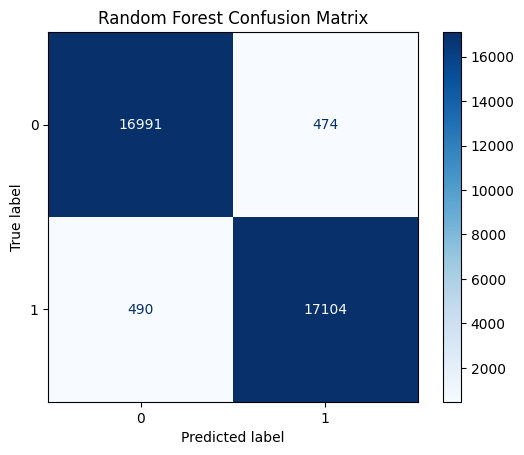


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17465
           1       0.97      0.97      0.97     17594

    accuracy                           0.97     35059
   macro avg       0.97      0.97      0.97     35059
weighted avg       0.97      0.97      0.97     35059



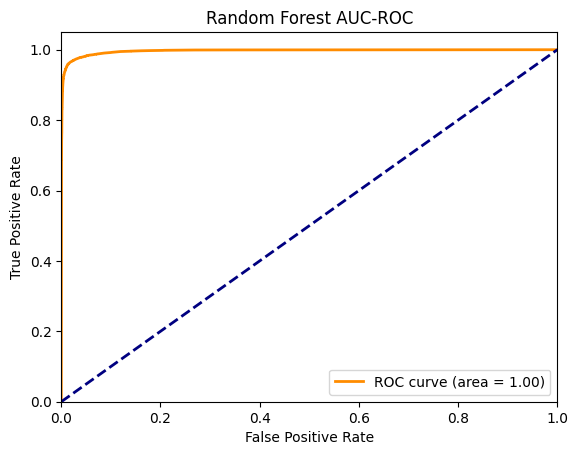


 
 Execution time: 549.1600863933563 seconds


In [60]:
# 3. Random Forest model

# Start time
start_time = time.time()


RFC_model = RandomForestClassifier()
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(RFC_model, rf_param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)
rf_random_search.fit(x_train, y_train)


# Best parameters and score for Random Forest
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best score for Random Forest:", rf_random_search.best_score_)

# Evaluate the best Random Forest model on the test set
best_rf_model = rf_random_search.best_estimator_
rf_y_pred = best_rf_model.predict(x_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_y_pred))


# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)


# Plot absolute confusion matrix with blue colormap
rf_disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Predicted probabilities for the positive class (used for AUC-ROC)
rf_y_prob = best_rf_model.predict_proba(x_test)[:, 1]

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest AUC-ROC')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'euclidean'}
Best score for KNN: 0.9349867643167535
KNN Test Accuracy: 0.9397016457970849


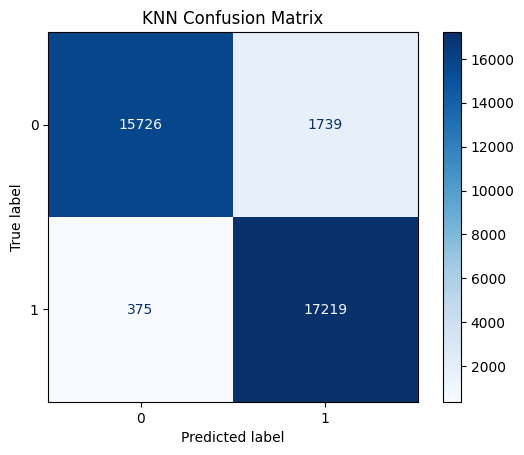


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     17465
           1       0.91      0.98      0.94     17594

    accuracy                           0.94     35059
   macro avg       0.94      0.94      0.94     35059
weighted avg       0.94      0.94      0.94     35059



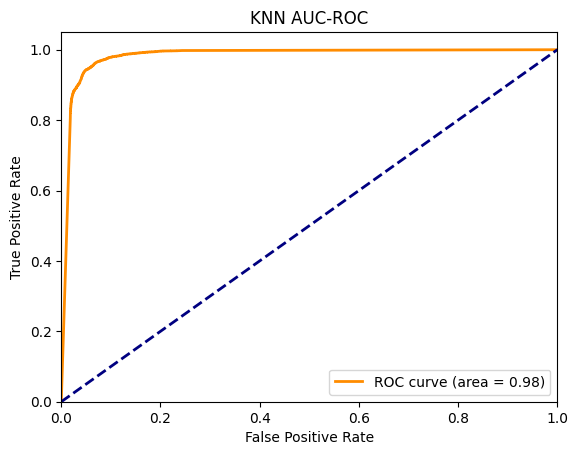


 
 Execution time: 70.3084146976471 seconds


In [61]:
# 4. KNN Model

# Start time
start_time = time.time()

# KNN model with hyperparameter tuning using RandomSearch
knn_model = KNeighborsClassifier()
knn_param_dist = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid_search = RandomizedSearchCV(knn_model, knn_param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state = 42)
knn_grid_search.fit(x_train, y_train)

# Best parameters and score for KNN
print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best score for KNN:", knn_grid_search.best_score_)

# Evaluate the best KNN model on the test set
best_knn_model = knn_grid_search.best_estimator_
knn_y_pred = best_knn_model.predict(x_test)
print("KNN Test Accuracy:", accuracy_score(y_test, knn_y_pred))

# Confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_disp.plot(cmap='Blues', values_format='d')
plt.title("KNN Confusion Matrix")
plt.show()

# Classification report for Random Forest
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

# Predicted probabilities for the positive class (used for AUC-ROC)
knn_y_prob = best_knn_model.predict_proba(x_test)[:, 1]

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN AUC-ROC')
plt.legend(loc="lower right")
plt.show()

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('\n \n Execution time:',execution_time,'seconds')

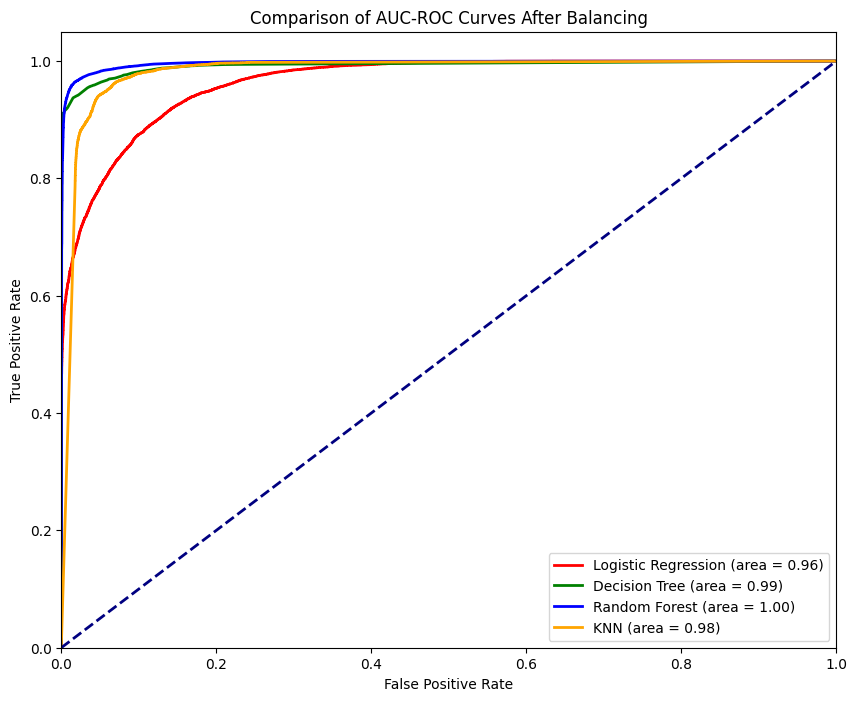

In [62]:
# Calculate ROC curve points

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg_y_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_y_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_y_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting all the ROC curves on the same plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (area = {roc_auc_lr:.2f})', color='red', lw=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (area = {roc_auc_dt:.2f})', color='green', lw=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})', color='blue', lw=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (area = {roc_auc_knn:.2f})', color='orange', lw=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of AUC-ROC Curves After Balancing')
plt.legend(loc="lower right")
plt.show()


In [63]:
# Print the best model details for KNN
print("Best KNN Model")
print("Best Parameters:", knn_grid_search.best_params_)
print("Best Score:", knn_grid_search.best_score_)
print("AUC-ROC:", auc(fpr, tpr))
print("Execution Time:", execution_time, "seconds")

Best KNN Model
Best Parameters: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'euclidean'}
Best Score: 0.9349867643167535
AUC-ROC: 0.9820169350214094
Execution Time: 70.3084146976471 seconds
